In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
fish = pd.read_csv('data/fish.csv')

In [3]:
fish.head()

,#,Name,Sell,Where/How,Shadow,Total Catches to Unlock,Spawn Rates,Rain/Snow Catch Up,NH Jan,NH Feb,...,SH Dec,Color 1,Color 2,Size,Lighting Type,Icon Filename,Critterpedia Filename,Furniture Filename,Internal ID,Unique Entry ID
0,56,anchovy,200,Sea,Small,0,2–5,No,4 AM – 9 PM,4 AM – 9 PM,...,4 AM – 9 PM,Blue,Red,1x1,No lighting,Fish81,FishAntyobi,FtrFishAntyobi,4201,LzuWkSQP55uEpRCP5
1,36,angelfish,3000,River,Small,20,2–5,No,NaN,NaN,...,4 PM – 9 AM,Yellow,Black,1x1,Fluorescent,Fish30,FishAngelfish,FtrFishAngelfish,2247,XTCFCk2SiuY5YXLZ7
2,44,arapaima,10000,River,XX-Large,50,1,Yes,NaN,NaN,...,4 PM – 9 AM,Black,Blue,3x2,No lighting,Fish36,FishPiraruku,FtrFishPiraruku,2253,mZy4BES54bqwi97br
3,41,arowana,10000,River,Large,50,1–2,No,NaN,NaN,...,4 PM – 9 AM,Yellow,Black,2x1,Fluorescent,Fish33,FishArowana,FtrFishArowana,2250,F68AvCaqddBJL7ZSN
4,58,barred knifejaw,5000,Sea,Medium,20,3–5,No,NaN,NaN,...,All day,White,Black,1x1,Fluorescent,Fish47,FishIshidai,FtrFishIshidai,2265,X3R9SFSAaDzBF4fE3


In [4]:
fish.columns = fish.columns.str.lower()
fish.columns = fish.columns.str.replace(' ', '_')
fish.columns = fish.columns.str.replace('/', '_')

In [5]:
fish.columns

Index(['#', 'name', 'sell', 'where_how', 'shadow', 'total_catches_to_unlock',
       'spawn_rates', 'rain_snow_catch_up', 'nh_jan', 'nh_feb', 'nh_mar',
       'nh_apr', 'nh_may', 'nh_jun', 'nh_jul', 'nh_aug', 'nh_sep', 'nh_oct',
       'nh_nov', 'nh_dec', 'sh_jan', 'sh_feb', 'sh_mar', 'sh_apr', 'sh_may',
       'sh_jun', 'sh_jul', 'sh_aug', 'sh_sep', 'sh_oct', 'sh_nov', 'sh_dec',
       'color_1', 'color_2', 'size', 'lighting_type', 'icon_filename',
       'critterpedia_filename', 'furniture_filename', 'internal_id',
       'unique_entry_id'],
      dtype='object')

In [6]:
fish = fish.drop(columns=["#", 'total_catches_to_unlock',
                          'color_1', 'color_2', 'size',
                          'lighting_type', 'icon_filename',
                          'critterpedia_filename', 'furniture_filename', 
                          'internal_id', 'unique_entry_id'])

In [7]:
fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 30 columns):
name                  80 non-null object
sell                  80 non-null int64
where_how             80 non-null object
shadow                80 non-null object
spawn_rates           80 non-null object
rain_snow_catch_up    80 non-null object
nh_jan                31 non-null object
nh_feb                31 non-null object
nh_mar                35 non-null object
nh_apr                39 non-null object
nh_may                44 non-null object
nh_jun                55 non-null object
nh_jul                58 non-null object
nh_aug                60 non-null object
nh_sep                63 non-null object
nh_oct                42 non-null object
nh_nov                37 non-null object
nh_dec                32 non-null object
sh_jan                58 non-null object
sh_feb                60 non-null object
sh_mar                63 non-null object
sh_apr                42 non-null obj

In [8]:
sh_month_cols = [c for c in fish.columns.to_list() if "sh_" in c]
nh_month_cols = [c for c in fish.columns.to_list() if "nh_" in c]

In [46]:
month_cols = sh_month_cols + nh_month_cols

In [44]:
fish.head()

,name,sell,where_how,shadow,spawn_rates,rain_snow_catch_up,nh_jan,nh_feb,nh_mar,nh_apr,...,sh_mar,sh_apr,sh_may,sh_jun,sh_jul,sh_aug,sh_sep,sh_oct,sh_nov,sh_dec
0,anchovy,200,Sea,Small,2–5,No,4 AM – 9 PM,4 AM – 9 PM,4 AM – 9 PM,4 AM – 9 PM,...,4 AM – 9 PM,4 AM – 9 PM,4 AM – 9 PM,4 AM – 9 PM,4 AM – 9 PM,4 AM – 9 PM,4 AM – 9 PM,4 AM – 9 PM,4 AM – 9 PM,4 AM – 9 PM
1,angelfish,3000,River,Small,2–5,No,NaN,NaN,NaN,NaN,...,4 PM – 9 AM,4 PM – 9 AM,NaN,NaN,NaN,NaN,NaN,NaN,4 PM – 9 AM,4 PM – 9 AM
2,arapaima,10000,River,XX-Large,1,Yes,NaN,NaN,NaN,NaN,...,4 PM – 9 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4 PM – 9 AM
3,arowana,10000,River,Large,1–2,No,NaN,NaN,NaN,NaN,...,4 PM – 9 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4 PM – 9 AM
4,barred knifejaw,5000,Sea,Medium,3–5,No,NaN,NaN,All day,All day,...,All day,All day,All day,NaN,NaN,NaN,All day,All day,All day,All day


In [21]:
fish["time"] = ""

In [48]:
for i, row in fish.iterrows():
    fish.at[i, 'time'] = fish.iloc[i][month_cols].dropna()[0]

In [49]:
fish['time'].value_counts()

All day                     44
4 PM – 9 AM                 16
9 AM – 4 PM                 10
4 AM – 9 PM                  5
9 PM – 4 AM                  4
9 AM – 4 PM; 9 PM – 4 AM     1
Name: time, dtype: int64

In [57]:
# Getting the num of available fish per month per hemisphere
month_totals = (~fish[month_cols].isna()).sum()

In [58]:
month_totals

sh_jan    58
sh_feb    60
sh_mar    63
sh_apr    42
sh_may    37
sh_jun    32
sh_jul    31
sh_aug    31
sh_sep    35
sh_oct    39
sh_nov    44
sh_dec    55
nh_jan    31
nh_feb    31
nh_mar    35
nh_apr    39
nh_may    44
nh_jun    55
nh_jul    58
nh_aug    60
nh_sep    63
nh_oct    42
nh_nov    37
nh_dec    32
dtype: int64

In [82]:
fish[month_cols] = (~fish[month_cols].isna())

In [83]:
fish.head()

,name,sell,where_how,shadow,spawn_rates,rain_snow_catch_up,nh_jan,nh_feb,nh_mar,nh_apr,...,sh_jun,sh_jul,sh_aug,sh_sep,sh_oct,sh_nov,sh_dec,time,min_spawn,max_spawn
0,anchovy,200,Sea,Small,2–5,0,True,True,True,True,...,True,True,True,True,True,True,True,day,2,5
1,angelfish,3000,River,Small,2–5,0,False,False,False,False,...,False,False,False,False,False,True,True,night,2,5
2,arapaima,10000,River,XX-Large,1,1,False,False,False,False,...,False,False,False,False,False,False,True,night,1,1
3,arowana,10000,River,Large,1–2,0,False,False,False,False,...,False,False,False,False,False,False,True,night,1,2
4,barred knifejaw,5000,Sea,Medium,3–5,0,False,False,True,True,...,False,False,False,True,True,True,True,all,3,5


In [66]:
fish['shadow'].value_counts()

Small           17
X-Small         13
Medium          13
Large           12
X-Large         10
XX-Large         7
Large w/Fin      5
Long             2
Medium w/Fin     1
Name: shadow, dtype: int64

In [67]:
shadow_order = ['X-Small',
                'Small',
                'Medium',
                'Medium w/Fin',
                'Long',
                'Large',
                'Large w/Fin',
                'X-Large',
                'XX-Large']

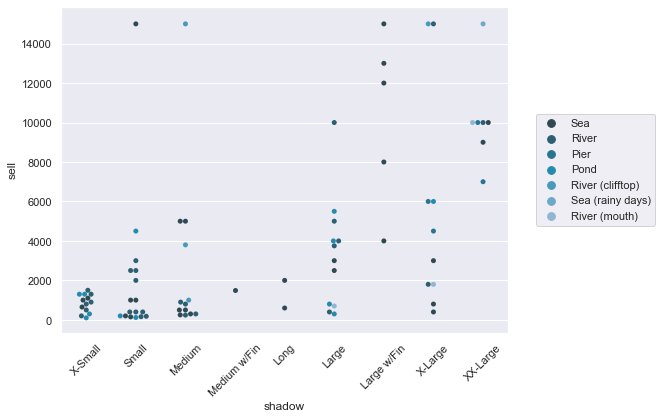

In [68]:
plt.figure(figsize=(8,6))
sns.swarmplot('shadow', 'sell', data=fish, 
              hue='where_how', 
              order=shadow_order, 
              palette="PuBuGn_d")
plt.xticks(rotation=45)
plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.5), ncol=1)
plt.show()

In [69]:
fish['spawn_rates'].value_counts()

1        13
2         9
1–2       8
1–4       5
2–3       4
2–5       3
4–12      3
5         2
6–8       2
3–9       2
7–10      2
5–7       2
7–9       2
3–5       2
5–6       2
18–20     1
1–3       1
6         1
5–10      1
3–10      1
3–4       1
4         1
14–21     1
20        1
10–11     1
6–9       1
4–5       1
12–16     1
12–17     1
11–18     1
7–8       1
11–14     1
4–6       1
6–10      1
Name: spawn_rates, dtype: int64

In [70]:
yn_map = {"Yes": 1, "No":0}
fish['rain_snow_catch_up'] = [yn_map[item] for item in fish['rain_snow_catch_up']]

In [71]:
fish[['spawn_rates', 'rain_snow_catch_up']]

,spawn_rates,rain_snow_catch_up
0,2–5,0
1,2–5,0
2,1,1
3,1–2,0
4,3–5,0
...,...,...
75,7–9,0
76,2,1
77,1,1
78,7–10,0


In [80]:
fish['min_spawn'] = fish['spawn_rates']
fish['max_spawn'] = fish['spawn_rates']

for i, row in fish.iterrows():
    if "–" in fish['spawn_rates'][i]:
        fish.at[i,'min_spawn'] = row['spawn_rates'].split("–")[0]
        fish.at[i,'max_spawn'] = row['spawn_rates'].split("–")[-1]

In [81]:
fish['max_spawn'].value_counts()

2     17
1     13
5      8
4      7
10     5
3      5
9      5
6      4
8      3
12     3
7      2
20     2
17     1
21     1
11     1
18     1
14     1
16     1
Name: max_spawn, dtype: int64

In [74]:
fish_avail = {'4 AM – 9 PM': "day",
              '9 AM –\xa04 PM': "midday",
              '4 PM –\xa09 AM': "night",
              '9 PM –\xa04 AM': "late",
              '9 AM –\xa04 PM; 9 PM – 4 AM': ["midday","late"],
              'All day': "all"}

In [75]:
fish.time.unique()

array(['4 AM – 9 PM', '4 PM –\xa09 AM', 'All day', '9 PM –\xa04 AM',
       '9 AM –\xa04 PM', '9 AM –\xa04 PM; 9 PM – 4 AM'], dtype=object)

In [76]:
fish['time'] = [fish_avail[item] for item in fish['time']]

In [84]:
fish.head()

,name,sell,where_how,shadow,spawn_rates,rain_snow_catch_up,nh_jan,nh_feb,nh_mar,nh_apr,...,sh_jun,sh_jul,sh_aug,sh_sep,sh_oct,sh_nov,sh_dec,time,min_spawn,max_spawn
0,anchovy,200,Sea,Small,2–5,0,True,True,True,True,...,True,True,True,True,True,True,True,day,2,5
1,angelfish,3000,River,Small,2–5,0,False,False,False,False,...,False,False,False,False,False,True,True,night,2,5
2,arapaima,10000,River,XX-Large,1,1,False,False,False,False,...,False,False,False,False,False,False,True,night,1,1
3,arowana,10000,River,Large,1–2,0,False,False,False,False,...,False,False,False,False,False,False,True,night,1,2
4,barred knifejaw,5000,Sea,Medium,3–5,0,False,False,True,True,...,False,False,False,True,True,True,True,all,3,5


In [109]:
fish['min_spawn'] = fish['min_spawn'].astype(int)
fish['max_spawn'] = fish['max_spawn'].astype(int)

In [110]:
fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 33 columns):
name                  80 non-null object
sell                  80 non-null int64
where_how             80 non-null object
shadow                80 non-null object
spawn_rates           80 non-null object
rain_snow_catch_up    80 non-null int64
nh_jan                80 non-null bool
nh_feb                80 non-null bool
nh_mar                80 non-null bool
nh_apr                80 non-null bool
nh_may                80 non-null bool
nh_jun                80 non-null bool
nh_jul                80 non-null bool
nh_aug                80 non-null bool
nh_sep                80 non-null bool
nh_oct                80 non-null bool
nh_nov                80 non-null bool
nh_dec                80 non-null bool
sh_jan                80 non-null bool
sh_feb                80 non-null bool
sh_mar                80 non-null bool
sh_apr                80 non-null bool
sh_may                80 non-

In [111]:
# fish.to_csv('fish_clean.csv', index=False)

In [85]:
nh_june = fish[fish['nh_jun'] == True]

In [86]:
nh_june

,name,sell,where_how,shadow,spawn_rates,rain_snow_catch_up,nh_jan,nh_feb,nh_mar,nh_apr,...,sh_jun,sh_jul,sh_aug,sh_sep,sh_oct,sh_nov,sh_dec,time,min_spawn,max_spawn
0,anchovy,200,Sea,Small,2–5,0,True,True,True,True,...,True,True,True,True,True,True,True,day,2,5
1,angelfish,3000,River,Small,2–5,0,False,False,False,False,...,False,False,False,False,False,True,True,night,2,5
2,arapaima,10000,River,XX-Large,1,1,False,False,False,False,...,False,False,False,False,False,False,True,night,1,1
3,arowana,10000,River,Large,1–2,0,False,False,False,False,...,False,False,False,False,False,False,True,night,1,2
4,barred knifejaw,5000,Sea,Medium,3–5,0,False,False,True,True,...,False,False,False,True,True,True,True,all,3,5
5,barreleye,15000,Sea,Small,1,0,True,True,True,True,...,True,True,True,True,True,True,True,late,1,1
6,betta,2500,River,Small,1–4,0,False,False,False,False,...,False,False,False,False,False,True,True,midday,1,4
8,black bass,400,River,Large,4–12,0,True,True,True,True,...,True,True,True,True,True,True,True,all,4,12
11,bluegill,180,River,Small,6–10,0,True,True,True,True,...,True,True,True,True,True,True,True,midday,6,10
12,butterfly fish,1000,Sea,Small,4–5,0,False,False,False,True,...,False,False,False,False,True,True,True,all,4,5


In [91]:
nh_june_sum = nh_june['min_spawn'].astype(int).sum()

In [93]:
nh_june_river = nh_june[nh_june['where_how'] == "River"]

In [96]:
nh_june_river

,name,sell,where_how,shadow,spawn_rates,rain_snow_catch_up,nh_jan,nh_feb,nh_mar,nh_apr,...,sh_jun,sh_jul,sh_aug,sh_sep,sh_oct,sh_nov,sh_dec,time,min_spawn,max_spawn
1,angelfish,3000,River,Small,2–5,0,False,False,False,False,...,False,False,False,False,False,True,True,night,2,5
2,arapaima,10000,River,XX-Large,1,1,False,False,False,False,...,False,False,False,False,False,False,True,night,1,1
3,arowana,10000,River,Large,1–2,0,False,False,False,False,...,False,False,False,False,False,False,True,night,1,2
6,betta,2500,River,Small,1–4,0,False,False,False,False,...,False,False,False,False,False,True,True,midday,1,4
8,black bass,400,River,Large,4–12,0,True,True,True,True,...,True,True,True,True,True,True,True,all,4,12
11,bluegill,180,River,Small,6–10,0,True,True,True,True,...,True,True,True,True,True,True,True,midday,6,10
20,crucian carp,160,River,Small,4–12,0,True,True,True,True,...,True,True,True,True,True,True,True,all,4,12
22,dace,240,River,Medium,3–10,0,True,True,True,True,...,True,True,True,True,True,True,True,night,3,10
23,dorado,15000,River,X-Large,1–2,0,False,False,False,False,...,False,False,False,False,False,False,True,day,1,2
25,freshwater goby,400,River,Small,2–5,0,True,True,True,True,...,True,True,True,True,True,True,True,night,2,5


In [95]:
(nh_june_river['min_spawn'].astype(int))/(nh_june_river['min_spawn'].astype(int).sum())

1     0.04
2     0.02
3     0.02
6     0.02
8     0.08
11    0.12
20    0.08
22    0.06
23    0.02
25    0.04
33    0.04
44    0.04
45    0.04
49    0.12
51    0.02
55    0.04
60    0.02
66    0.04
75    0.14
Name: min_spawn, dtype: float64

In [99]:
nh_june[nh_june['where_how'] == "Pier"]

,name,sell,where_how,shadow,spawn_rates,rain_snow_catch_up,nh_jan,nh_feb,nh_mar,nh_apr,...,sh_jun,sh_jul,sh_aug,sh_sep,sh_oct,sh_nov,sh_dec,time,min_spawn,max_spawn
29,giant trevally,4500,Pier,X-Large,1,0,False,False,False,False,...,False,False,False,False,False,True,True,all,1,1
40,mahi-mahi,6000,Pier,X-Large,1,1,False,False,False,False,...,False,False,False,False,False,True,True,all,1,1
